In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations':
  os.chdir(r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/zipimport.py": 1708118050.3201988, "/home/hasan/miniconda3/lib/python3.12/codecs.py": 1708118050.0762022, "/home/hasan/miniconda3/lib/python3.12/encodings/aliases.py": 1708118050.5121963, "/home/hasan/miniconda3/lib/python3.12/encodings/__init__.py": 1708118050.6041949, "/home/hasan/miniconda3/lib/python3.12/encodings/utf_8.py": 1708118050.7081935, "/home/hasan/miniconda3/lib/python3.12/abc.py": 1708118050.0562024, "/home/hasan/miniconda3/lib/python3.12/io.py": 1708118050.1442013, "/home/hasan/miniconda3/lib/python3.12/stat.py": 1708118050.2561998, "/home/hasan/miniconda3/lib/python3.12/_collections_abc.py": 1708118050.084202, "/home/hasan/miniconda3/lib/python3.12/genericpath.py": 1708118050.1242015, "/home/hasan/miniconda3/lib/python3.12/posixpath.py": 1708118050.19220

In [2]:
#| eval: true
import numpy as np
import matplotlib.pyplot as plt

# Create a tiny 3x3 grayscale image
tiny_image = np.array([
    [0,   128, 255],
    [64,  192, 128], 
    [255, 64,  0  ]
])

print("Our tiny image as numbers:")
print(tiny_image)
print(f"\nImage shape: {tiny_image.shape}")
print(f"Image data type: {tiny_image.dtype}")

Our tiny image as numbers:
[[  0 128 255]
 [ 64 192 128]
 [255  64   0]]

Image shape: (3, 3)
Image data type: int64


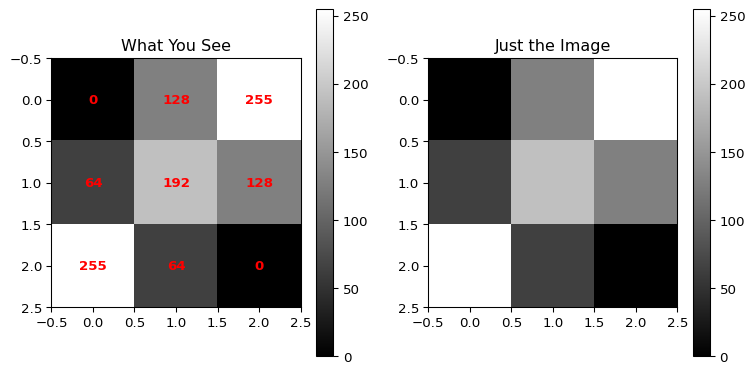

In [3]:
#| eval: true
plt.figure(figsize=(8, 4))

# Show the numbers
plt.subplot(1, 2, 1)
plt.imshow(tiny_image, cmap='gray', interpolation='nearest')
plt.title("What You See")
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(tiny_image[i, j]), 
                ha='center', va='center', color='red', fontweight='bold')
plt.colorbar()

# Show as image
plt.subplot(1, 2, 2)
plt.imshow(tiny_image, cmap='gray', interpolation='nearest')
plt.title("Just the Image")
plt.colorbar()

plt.tight_layout()
plt.show()

Color image shape: (2, 2, 3)
This means: 2 rows, 2 columns, 3 color channels


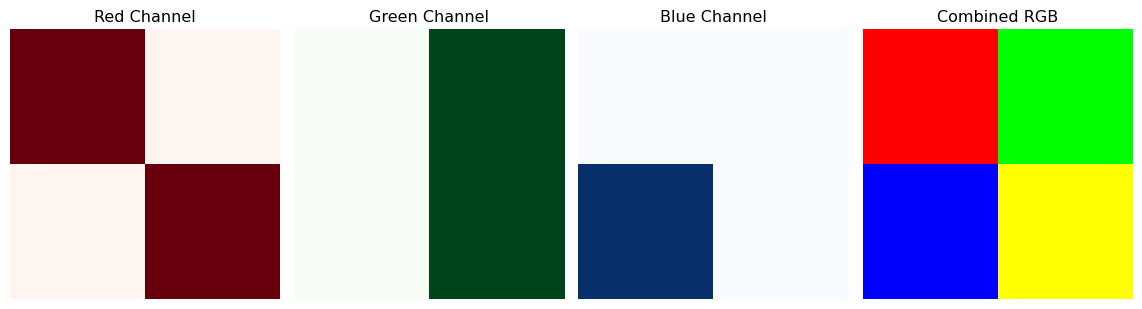

In [4]:
#| eval: true
# Create a simple 2x2 color image
color_image = np.array([
    [[255, 0, 0], [0, 255, 0]],      # Red pixel, Green pixel
    [[0, 0, 255], [255, 255, 0]]     # Blue pixel, Yellow pixel
])

print("Color image shape:", color_image.shape)
print("This means: 2 rows, 2 columns, 3 color channels")

plt.figure(figsize=(12, 4))

# Show each color channel
channels = ['Red', 'Green', 'Blue']
colors = ['Reds', 'Greens', 'Blues']

for i in range(3):
    plt.subplot(1, 4, i+1)
    plt.imshow(color_image[:, :, i], cmap=colors[i])
    plt.title(f"{channels[i]} Channel")
    plt.axis('off')

# Show the combined image
plt.subplot(1, 4, 4)
plt.imshow(color_image)
plt.title("Combined RGB")
plt.axis('off')

plt.tight_layout()
plt.show()

Image shape: (627, 1200, 3)
Image size: 2257200 pixels
Data type: uint8


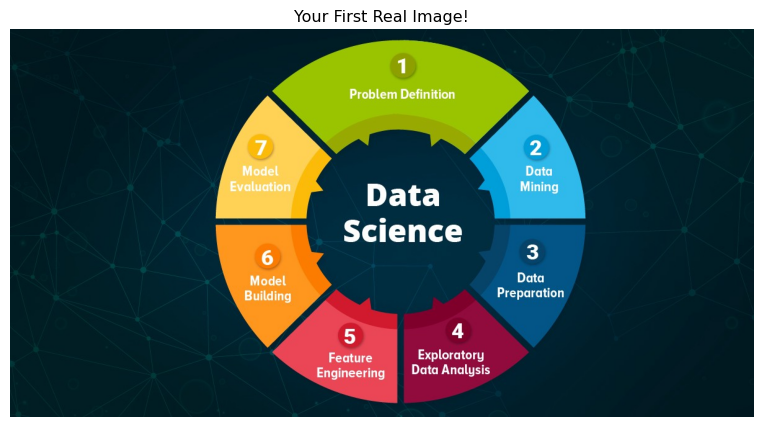


A small 10x10 patch from the image:
Shape: (10, 10, 3)
First pixel RGB values: [ 2 31 37]


In [5]:
#| eval: true
import cv2

# Load an image (you can upload your own to Colab!)
img = cv2.imread('images/image.jpg')

# OpenCV loads images in BGR format, let's convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f"Image shape: {img_rgb.shape}")
print(f"Image size: {img_rgb.size} pixels")
print(f"Data type: {img_rgb.dtype}")

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title("Your First Real Image!")
plt.axis('off')
plt.show()

# Let's examine a small patch
patch = img_rgb[100:110, 100:110]  # 10x10 pixel patch
print(f"\nA small 10x10 patch from the image:")
print(f"Shape: {patch.shape}")
print(f"First pixel RGB values: {patch[0, 0]}")

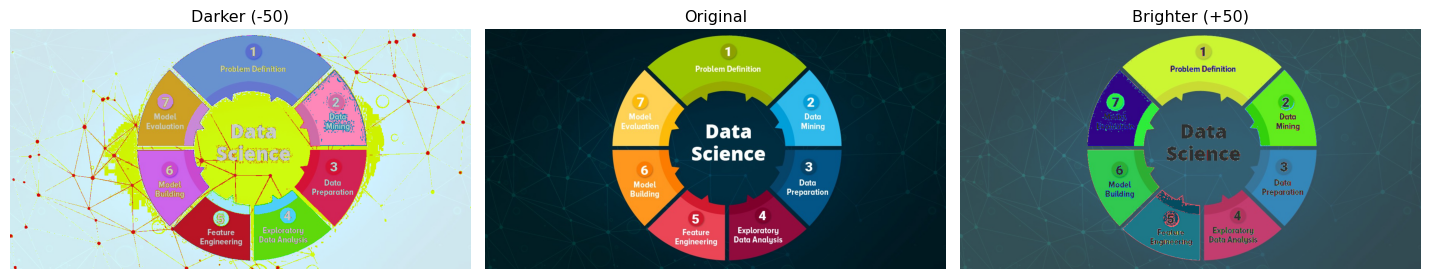

In [6]:
#| eval: true
# Load and prepare image
img = cv2.imread('images/image.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Make it brighter (add to all pixels)
brighter = np.clip(img_rgb + 50, 0, 255).astype(np.uint8)

# Make it darker (subtract from all pixels)  
darker = np.clip(img_rgb - 50, 0, 255).astype(np.uint8)

# Show the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(darker)
plt.title("Darker (-50)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(brighter)
plt.title("Brighter (+50)")
plt.axis('off')

plt.tight_layout()
plt.show()

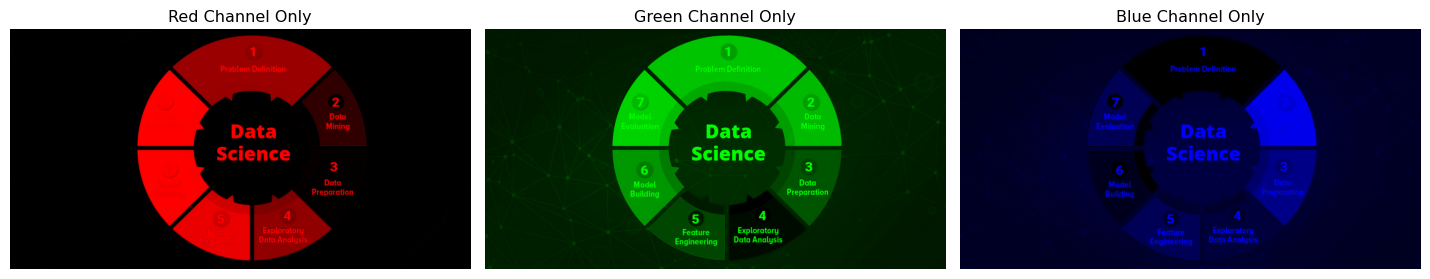

In [7]:
#| eval: true
# Create different color effects
red_only = img_rgb.copy()
red_only[:, :, 1] = 0  # Remove green
red_only[:, :, 2] = 0  # Remove blue

green_only = img_rgb.copy()
green_only[:, :, 0] = 0  # Remove red
green_only[:, :, 2] = 0  # Remove blue

blue_only = img_rgb.copy()
blue_only[:, :, 0] = 0  # Remove red
blue_only[:, :, 1] = 0  # Remove green

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(red_only)
plt.title("Red Channel Only")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_only)
plt.title("Green Channel Only")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_only)
plt.title("Blue Channel Only")
plt.axis('off')

plt.tight_layout()
plt.show()

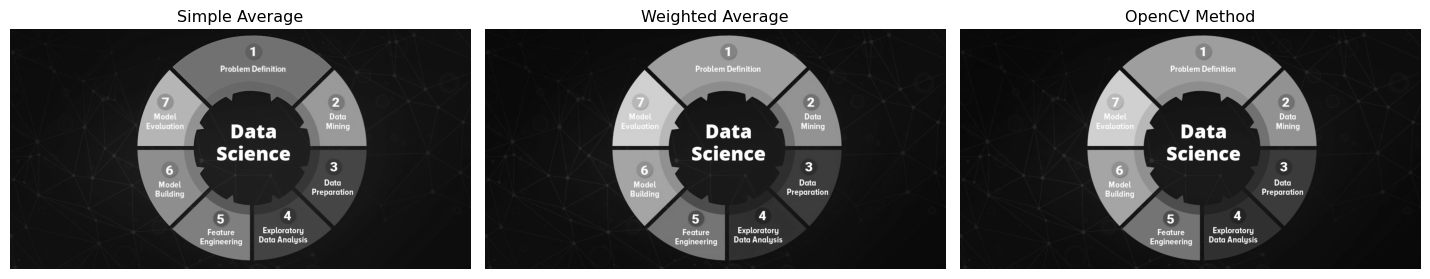

In [8]:
#| eval: true
# Method 1: Simple average (not the best)
gray_simple = np.mean(img_rgb, axis=2).astype(np.uint8)

# Method 2: Weighted average (the right way!)
# Human eyes are more sensitive to green, less to blue
gray_weighted = (0.299 * img_rgb[:, :, 0] + 
                0.587 * img_rgb[:, :, 1] + 
                0.114 * img_rgb[:, :, 2]).astype(np.uint8)

# Method 3: Using OpenCV (does the weighted average for us)
gray_opencv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_simple, cmap='gray')
plt.title("Simple Average")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_weighted, cmap='gray')
plt.title("Weighted Average")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_opencv, cmap='gray')
plt.title("OpenCV Method")
plt.axis('off')

plt.tight_layout()
plt.show()

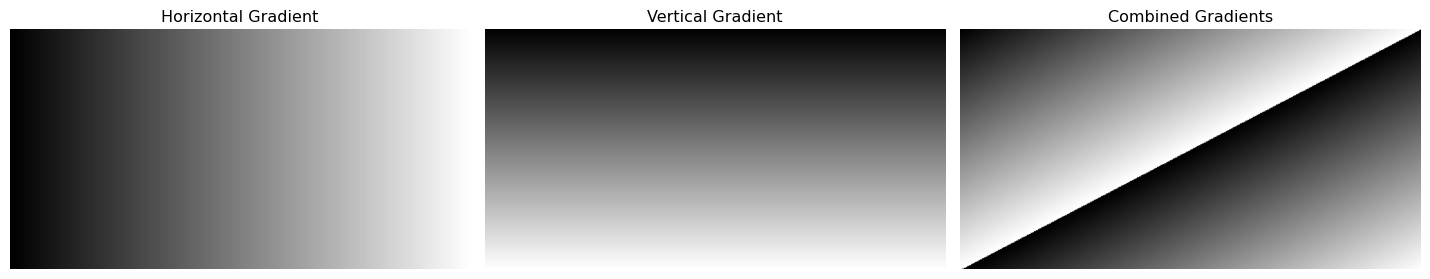

In [9]:
#| eval: true
# Create a simple pattern
rows, cols = img_rgb.shape[:2]
x_gradient = np.linspace(0, 255, cols).astype(np.uint8)
y_gradient = np.linspace(0, 255, rows).astype(np.uint8)

# Create gradient patterns
horizontal_gradient = np.tile(x_gradient, (rows, 1))
vertical_gradient = np.tile(y_gradient.reshape(-1, 1), (1, cols))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(horizontal_gradient, cmap='gray')
plt.title("Horizontal Gradient")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(vertical_gradient, cmap='gray')
plt.title("Vertical Gradient")
plt.axis('off')

# Combine gradients
combined = (horizontal_gradient + vertical_gradient) // 2
plt.subplot(1, 3, 3)
plt.imshow(combined, cmap='gray')
plt.title("Combined Gradients")
plt.axis('off')

plt.tight_layout()
plt.show()

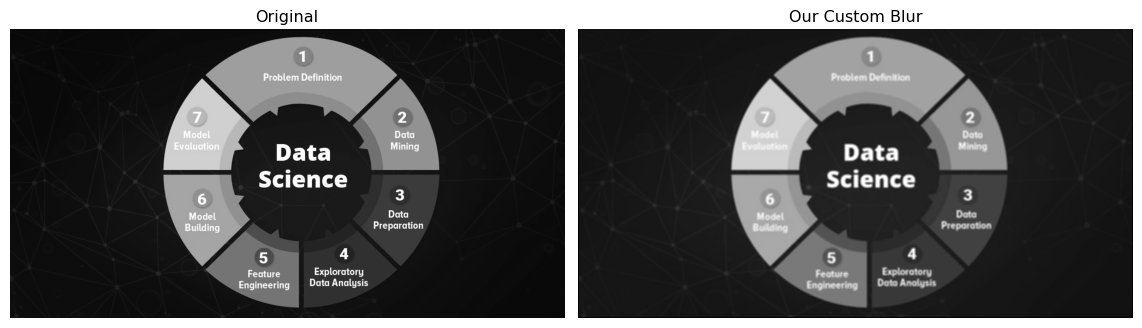

In [10]:
#| eval: true
def simple_blur(image, kernel_size=5):
    """Apply a simple blur by averaging neighboring pixels"""
    blurred = np.zeros_like(image)
    offset = kernel_size // 2
    
    for i in range(offset, image.shape[0] - offset):
        for j in range(offset, image.shape[1] - offset):
            # Average the pixels in the kernel area
            neighborhood = image[i-offset:i+offset+1, j-offset:j+offset+1]
            blurred[i, j] = np.mean(neighborhood)
    
    return blurred

# Apply our blur to a grayscale image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_img = simple_blur(gray_img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title("Our Custom Blur")
plt.axis('off')

plt.tight_layout()
plt.show()

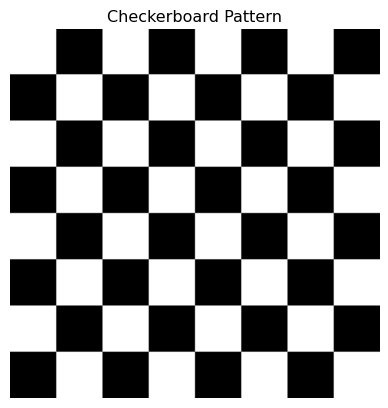

In [11]:
#| eval: true
# Create a checkerboard pattern
size = 200
checkerboard = np.zeros((size, size))
square_size = 25

for i in range(0, size, square_size):
    for j in range(0, size, square_size):
        if (i // square_size + j // square_size) % 2 == 0:
            checkerboard[i:i+square_size, j:j+square_size] = 255

plt.imshow(checkerboard, cmap='gray')
plt.title("Checkerboard Pattern")
plt.axis('off')
plt.show()

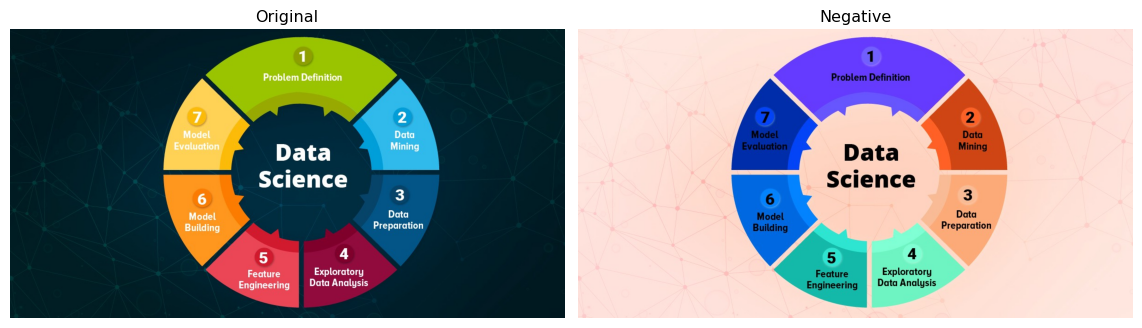

In [12]:
#| eval: true
# Create a negative effect (like old film negatives)
negative = 255 - img_rgb

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative)
plt.title("Negative")
plt.axis('off')

plt.tight_layout()
plt.show()